In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rowgenerators as rg

from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# Multiyear Nightime Light Intensity
`figshare.com-harmonized_ntl-1.1.1` Last Update: 2021-07-10T04:37:06

__


## Documentation Links

* [Research paper](https://www.nature.com/articles/s41597-020-0510-y) 
* [Download page](https://figshare.com/articles/dataset/Harmonization_of_DMSP_and_VIIRS_nighttime_light_data_from_1992-2018_at_the_global_scale/9828827/2) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)


## References
<ul><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2008_calDMSP.tif&resource_format=zip">ntl2008</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2009_calDMSP.tif&resource_format=zip">ntl2009</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2010_calDMSP.tif&resource_format=zip">ntl2010</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2011_calDMSP.tif&resource_format=zip">ntl2011</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2012_calDMSP.tif&resource_format=zip">ntl2012</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2013_calDMSP.tif&resource_format=zip">ntl2013</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2014_simVIIRS.tif&resource_format=zip">ntl2014</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2015_simVIIRS.tif&resource_format=zip">ntl2015</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2016_simVIIRS.tif&resource_format=zip">ntl2016</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2017_simVIIRS.tif&resource_format=zip">ntl2017</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2018_simVIIRS.tif&resource_format=zip">ntl2018</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1992_calDMSP.tif&resource_format=zip">ntl1992</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1993_calDMSP.tif&resource_format=zip">ntl1993</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1994_calDMSP.tif&resource_format=zip">ntl1994</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1995_calDMSP.tif&resource_format=zip">ntl1995</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1996_calDMSP.tif&resource_format=zip">ntl1996</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1997_calDMSP.tif&resource_format=zip">ntl1997</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1998_calDMSP.tif&resource_format=zip">ntl1998</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1999_calDMSP.tif&resource_format=zip">ntl1999</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2000_calDMSP.tif&resource_format=zip">ntl2000</a></strong>. </li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2001_calDMSP.tif&resource_format=zip">ntl2001</a></strong>. </li><

In [17]:
import rasterio
import numpy as np
import fiona
import rasterio
import rasterio.mask

In [ ]:
states=rg.geoframe('censusgeo://2019/05/US/state')
tx = states[states.stusps == 'TX']
tx.plot()

In [33]:
def load_ntl(year, shapes=None):
    
    ref = pkg.reference(f'ntl{year}').resolved_url.get_resource().get_target()
    
    with rasterio.open(ref.fspath) as src:
        
        if shapes is not None:
            img, transform = rasterio.mask.mask(src, shapes, crop=True)
        else:
            img =  src.read()
            transform = None
            
        meta = r.meta
        
        return img, meta, transform

ntl92, m92, t92 = load_ntl(1992, tx.geometry)
ntl18, m18, t18 = load_ntl(2018, tx.geometry)

<AxesSubplot:>

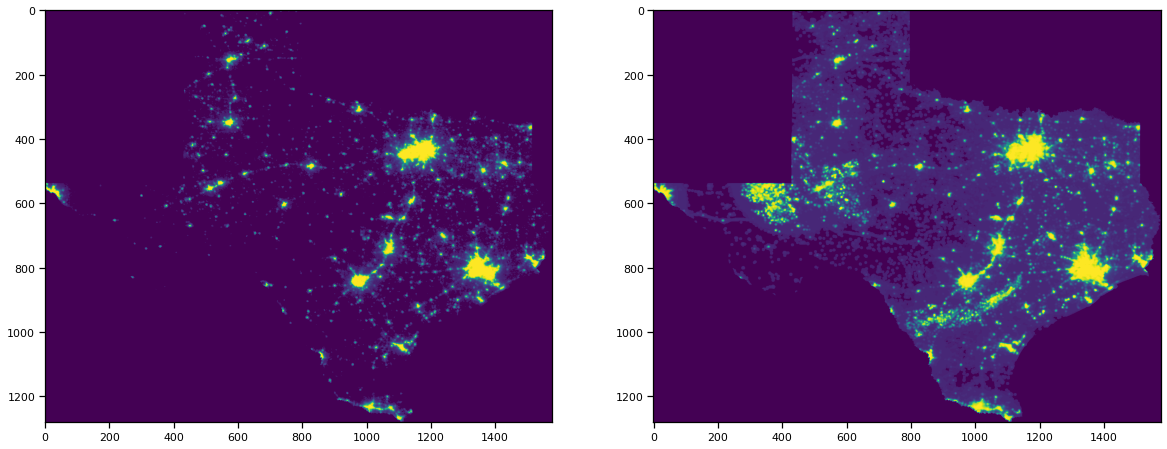

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax = np.ravel(ax)
show(ntl92,ax=ax[0])
show(ntl18,ax=ax[1])

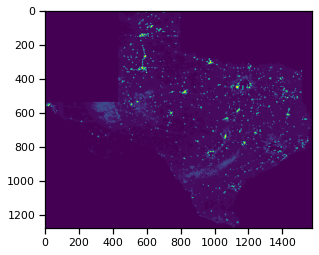

<AxesSubplot:>

In [40]:
show(ntl18-ntl92)

In [45]:
pd.Series(np.ravel(ntl18)).describe()

count    2.020137e+06
mean     5.248251e+00
std      1.078446e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      6.300000e+01
dtype: float64

In [44]:
pd.Series(np.ravel(ntl92)).describe()

count    2.020137e+06
mean     1.893399e+00
std      7.738735e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.300000e+01
dtype: float64

In [25]:
tx18_image, tx18_transform = rasterio.mask.mask(ntl18, tx.geometry, crop=True)
    

AttributeError: 'numpy.ndarray' object has no attribute 'nodata'

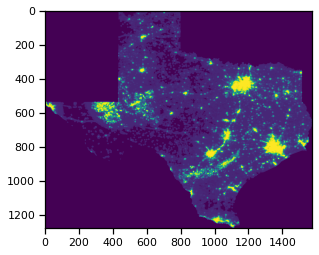

<AxesSubplot:>

In [14]:
show(out_image)